<a href="https://colab.research.google.com/github/RJuro/am-21/blob/main/AM21_peergrade1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Peergrade Øvelse

![](https://source.unsplash.com/Imwgit84NGo)

Ideen med denne øvelse er at give dig en mulighed bruge (næsten) alt vi har lært indtil videre med et nyt eksempel og uden tidspres. Du må rigtig gerne arbejde sammen med din gruppe dog er det vigtigt, at du har styr på alt selv. Brug også gerne Teams til at diskuttere problemer med andre. 
Alt som skal bruges af kode findes i de notebooks, som der blev brugt til undervisning.

I denne øvelse kommer I til at arbejde med lineær algebra på en lidt anden måde end tidligere, selvom tilgangen vil være den samme. I stedet for at arbejde x og y i traditionel forstand med, for eksempel, tid og pris på akserne, vil I blive introduceret til produktionsoptimering med to forskellige produkter på hver akse. Det kan være, at I har set lignende opgaver som del af mikroøkonomi.
  
Forestil jer, at I skriver et projekt i samarbejde med det lokale industri-bageri. I skal hjælpe butikken med at optimere produktion af cookies of muffins, for at få det maksimale udbytte. I har fået en oversigt over deres produktionsomkostninger, og skal nu forsøge at give butikken indblik i produktionsforholdet mellem muffins og cookies, ud fra forskellige parametre. 


**Pris** 
* Cookies bliver solgt til 32 kroner pr. kilo
* Muffins bliver solgt til 27 kroner pr. kilo

**Produktionsomkostninger**
* Cookies koster 21.72 kroner pr. kilo at producere
* Muffins koster 17.28 kroner pr. kilo at produere

**Arbejdstimer**
* Cookies koster 0.07 arbejdstimer at producere pr. kilo
* Muffins koster 0.09 arbejdstimer at producere pr. kilo


#### Opgave 1.1:
Bageriet har indkøbt ingredienser til muffins og cookies for 50.000kr i forbindelse med denne produktionscyklus.

Start med at visualisere produktionsforholdet mellem cookies og muffins, altså, hvor mange i kan producere af henholdsvis muffins og cookies, med de 50.000, i har til rådighed. Til dette skal i bruge produktionsprisen på cookies (y) og produktionsprisen på muffins (x).

Dette kan skrives i **generel form** som: $21.72*y + 17.28*x = 50000$

Omskriv dette til **hældningsafskæringsform** (slope-intercept form), så y står alene, og plot linjen visuelt. 


In [1]:
# pakke-import

import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt

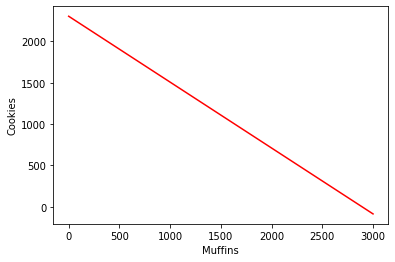

In [2]:
# Start med at definere x - brug numpy's linspace funktion til generere 1000 observationer mellem 0 og 3000
x = np.linspace(0, 3000, num=1000)
# definer jeres y ud fra ovenstående algebraiske udtryk
y1 = (50000-17.28*x)/21.72

# Navngiv jeres x- og y-akse.
plt.xlabel('Muffins')
plt.ylabel('Cookies')

#plot linjen 
plt.plot(x, y1, color = "red")

Det første plot giver dog kun et overblik, i hvordan produktionen af muffins og cookies kan fordeles, med udgangspunkt i de tilgængelige resurser. I målet om at finde den optimale fordeling, for at få maksimalt udbytte, er der også andre ting der skal overvejes.

#### Opgave 1.2:
Produktion af kager har flere omkostninger tilknyttet end blot ingredienser, herunder, arbejdstimer. Bageriet har tilknyttet **200** arbejdstimer til produktionen af muffins og cookies. 1 kilo cookies tager 0.07 arbejdstime at producere, hvor muffins tager 0.09 arbejdstime.

Omskriv dette til den **generelle form**, og herefter til **hældningsafskæringsform**.

Gentag herefter plottet fra opgave 1.1, og tilføj linjen for arbejdsomkostninger for muffins og cookies.



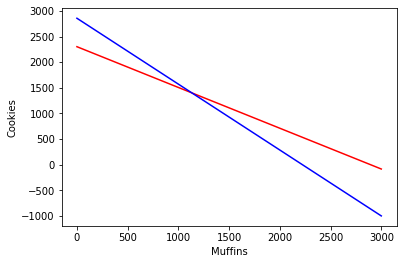

In [ ]:
# Start med at definere x - brug numpy's linspace funktion til generere 1000 observationer mellem 0 og 3000
x = np.linspace(0, 3000, num=1000)
# inddrag y fra opgave 1 (y1)
y1 = (50000-17.28*x)/21.72
# tilføj jeres algebraiske udtryk for arbejdsomkostninger (y2)
y2 = (200-0.09*x)/0.07

# Navngiv jeres x- og y-akse.
plt.xlabel('Muffins')
plt.ylabel('Cookies')

#plot linje y1 - giv den farven rød ("red")
plt.plot(x, y1, color = "red")

#plot linje y2 - giv den farven blå ("blue")
plt.plot(x, y2, color = "blue")

Ud fra ovenstående plot, kan vi nu få et indblik i mængden af henholdsvis muffins og cookies bageriet skal producere for at optimere udbyttet, med udgangspunkt i de 2 variable i har adgang til.

### Opgave 1.3
Selvom den grafiske fremstilling giver et visuelt overblik, har i brug for at finde den præcise kilomængde af muffins og cookies vi skal producere ud fra denne opstilling. Vores to lingninger kan skrives som denne augmented matrix:

$$
\left[
  \begin{matrix}
    21.72 & 17.28 \\
    0.07 & 0.09 \\
  \end{matrix}
  \left|
    \,
    \begin{matrix}
      50000  \\
      200  \\
    \end{matrix}
  \right.
\right]
$$

- Prøv at finde løsningen 'i hånden' først ved hjælp af **eliminationsmetoden** (i numpy), i kan muligvis huske tilgangen fra første [undervisningsgang](https://colab.research.google.com/github/RJuro/am-21/blob/main/HA_Math_1_1_Linear_Systems_edited.ipynb#scrollTo=DqGpjUg71znB). Skriv gerne kommentar i koden hvilke rækkeoperationer du bruger.


- Herefter kan i anvende sympy til at foretage udregningen direkte symbolisk.

- Du kan se en ny måde at løse opgaven med scipy nederst - det er også der, hvor du kan tjekke, om din løsning passer.


In [21]:
# definer matrix først
matrix = np.array([[21.72,17.28,50000],
[0.07,0.09,200]])

In [22]:
matrix

array([[   21.72,    17.28, 50000.  ],
       [    0.07,     0.09,   200.  ]])

In [23]:
# Række 1 divideres med 21.72
matrix[0] = matrix[0]/matrix[0,0]

In [24]:
matrix

array([[   1.        ,    0.79558011, 2302.02578269],
       [   0.07      ,    0.09      ,  200.        ]])

In [25]:
# Række2 - 0,07 gange række 1
matrix[1] = matrix[1] - (matrix[0]*matrix[1,0])

In [26]:
matrix

array([[   1.        ,    0.79558011, 2302.02578269],
       [   0.        ,    0.03430939,   38.85819521]])

In [27]:
# Række 1 minus (matrix[0,1]/matrix[1,1]) gange række 2
matrix[0] = matrix[0] - (matrix[1]*(matrix[0,1]/matrix[1,1]))

In [28]:
matrix

array([[   1.        ,    0.        , 1400.96618357],
       [   0.        ,    0.03430939,   38.85819521]])

In [30]:
# Række 2 / matrix[1,1]
matrix[1] = matrix[1]/matrix[1,1]

In [31]:
#tadah! 🎉
matrix

array([[   1.        ,    0.        , 1400.96618357],
       [   0.        ,    1.        , 1132.58185722]])

In [ ]:
#importer sympy pakker
from sympy import * #importer alt fra Sympy
from sympy.solvers.solveset import linsolve #importer linalg solver

#definer vores symboler (c for cookies, m for muffins)
c, m = symbols('c, m') 

# Brug linsolve til at finde den præcise skæring mellem produktionsomkostninger (y1) og arbejdsomkostninger (y2), og gem resultatet i xy_graphical
xy_graphical=linsolve(Matrix(([21.72,17.28,50000], [0.07,0.09,200])), (c, m)) 

# Print resultatet: xy_graphical
print(xy_graphical)

FiniteSet((1400.96618357488, 1132.58185721954))


In [ ]:
matrix[:,2:]

array([[50000.],
       [  200.]])

In [ ]:
# en 3. løsning som kan bruges (ny mulighed - bare for at se, den findes)
# vi kommer dog til at bruge sympy 👆 en del ifm calculus...og derfor er det fint lige at se på det allerede nu

from scipy import linalg

A = np.array([[21.72, 17.28],
       [ 0.07,  0.09]])

b = np.array([50000, 200])

x = linalg.solve(A,b)

In [ ]:
print(x)

[1400.96618357 1132.58185722]


### Opgave 1.4 
Nu hvor vi har fundet den "optimale" mængde af muffins og cookies i kg (vi runder til hele kg og husk du kan ikke rigtigt runde op fordi du ikke har ingredienser til det), kan vi udregne hvor meget bageriet kommer til at tjene, baseret på vores begrænsede informationer. 

In [ ]:
rt# Gem mængden af cookies i variablen qcookies - husk at runde ned til hele tal. 
qcookies=1400
# Gem mængden af muffins i variablen qmuffins - husk at runde ned til hele tal.
qmuffins=1132

#udregn den samlede omsætning for muffins (27*qmuffins) og cookies(32*qcookies)  
result=32*qcookies+27*qmuffins

#print resultatet, med teksten "dkk er vores omsætning for denne produktionsrunde"
print(result, "dkk er vores omsætning for denne produktionsrunde")

75504 dkk er vores omsætning for denne produktionsrunde


### Opgave 2

I opgave 1 tilgik vi problemet ved hjælp af grafisk visualisering, og løsning fra hældningsafskæringsform samt Gauss elimination  (+ automatisk løsning til tjek). I opgave 2 skal I løse samme problemstilling ved hjælp af multiplikativ invers. 

#### Opgave 2.1

Definer numpy arrays med $A$ som matrix_a og $\vec{b}$ som vector_b. Du må gerne copy-paste fra 1.3 (scipy demo)

In [32]:
# generér matrix_a
matrix_a = np.asarray([
[21.72,	17.28],
[0.07, 0.09],
], dtype=np.float32)
print(matrix_a)

vector_b = np.asarray([
[50000], [200]
], dtype=np.float32)

print(vector_b)

[[21.72 17.28]
 [ 0.07  0.09]]
[[50000.]
 [  200.]]


#### Opgave 2.2
Beregn $A^{-1}$ ved at bruge numpy funktion til dette.

In [33]:
#opgave 2.2.1
matrix_a_inverse = np.linalg.inv(matrix_a)

print(matrix_a_inverse)

[[  0.12077296 -23.188408  ]
 [ -0.09393452  29.146538  ]]


Vis, at $A^{-1}A = I$

In [35]:
# opgave 2.2.2

identity_matrix=np.dot(matrix_a_inverse, matrix_a)

print(identity_matrix)

[[ 0.99999994 -0.00000005]
 [-0.00000004  0.9999999 ]]


Vi ved, at $I\vec{x}=\vec{x}$ og derfor bliver $A^{-1}A\vec{x}=A^{-1}\vec{b}$ til $\vec{x} = A^{-1}\vec{b}$

Beregn $\vec{b}$ 

In [36]:
# opgave 2.2.3

vector_x=np.dot(matrix_a_inverse,vector_b)

print(vector_x) 

[[1400.9663]
 [1132.5815]]
